In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import time

from utils import RandomSeedResetter
from utils.ReservoirComputing import EchoStateNetwork

RandomSeedResetter.reset_random_seed(0)

In [2]:
log_esn_train_shuffle = np.load('data/_esn_lorenz/log_esn_train_shuffle.npy')
log_esn_valid = np.load('data/_esn_lorenz/log_esn_valid.npy')
log_esn_test = np.load('data/_esn_lorenz/log_esn_test.npy')

In [3]:
SIZE_LEAK = len(log_esn_train_shuffle[:])
SIZE_TRAIN_SHUFFLE = len(log_esn_train_shuffle[0, :])
SIZE_VALID = len(log_esn_valid[0, :])
SIZE_TEST = len(log_esn_test[0, :])
SIZE_VARIABLE = len(log_esn_train_shuffle[0, 0, :])

maxabs_esn_train_shuffle = np.zeros((SIZE_LEAK, SIZE_VARIABLE))
for idx_leak in range(SIZE_LEAK):
    maxabs_esn_train_shuffle[idx_leak, :] = np.max(abs(log_esn_train_shuffle[idx_leak, :, :]), axis=0)

log_esn_train_shuffle_norm = np.zeros((SIZE_LEAK, SIZE_TRAIN_SHUFFLE, SIZE_VARIABLE))
log_esn_valid_norm = np.zeros((SIZE_LEAK, SIZE_VALID, SIZE_VARIABLE))
log_esn_test_norm = np.zeros((SIZE_LEAK, SIZE_TEST, SIZE_VARIABLE))
for idx_leak in range(SIZE_LEAK):
    for idx_dim in range(SIZE_VARIABLE):
        if maxabs_esn_train_shuffle[idx_leak, idx_dim] != 0:
            log_esn_train_shuffle_norm[idx_leak, :, idx_dim] = \
                log_esn_train_shuffle[idx_leak, :, idx_dim] / maxabs_esn_train_shuffle[idx_leak, idx_dim]
            log_esn_valid_norm[idx_leak, :, idx_dim] = \
                log_esn_valid[idx_leak, :, idx_dim] / maxabs_esn_train_shuffle[idx_leak, idx_dim]
            log_esn_test_norm[idx_leak, :, idx_dim] = \
                log_esn_test[idx_leak, :, idx_dim] / maxabs_esn_train_shuffle[idx_leak, idx_dim]

leak: 0 , depth: 0


<function matplotlib.pyplot.show(*args, **kw)>

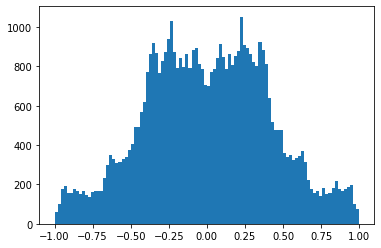

In [4]:
print('leak:', 0,  ', depth:', 0)
plt.figure()
plt.hist(log_esn_train_shuffle_norm[0, :, 0], bins=100)
plt.show

leak: -1 , depth: 0


<function matplotlib.pyplot.show(*args, **kw)>

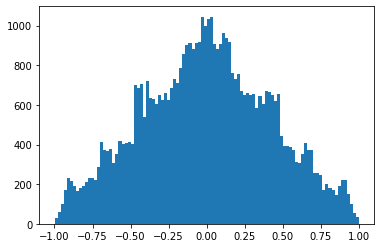

In [5]:
print('leak:', -1,  ', depth:', 0)
plt.figure()
plt.hist(log_esn_train_shuffle_norm[-1, :, 0], bins=100)
plt.show

leak: 0 , depth: -1


<function matplotlib.pyplot.show(*args, **kw)>

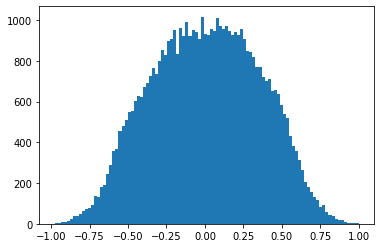

In [6]:
print('leak:', 0,  ', depth:', -1)
plt.figure()
plt.hist(log_esn_train_shuffle_norm[0, :, -1], bins=100)
plt.show

leak: -1 , depth: -1


<function matplotlib.pyplot.show(*args, **kw)>

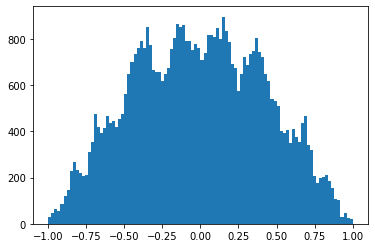

In [7]:
print('leak:', -1,  ', depth:', -1)
plt.figure()
plt.hist(log_esn_train_shuffle_norm[-1, :, -1], bins=100)
plt.show

leak: 0 , time: 0


<function matplotlib.pyplot.show(*args, **kw)>

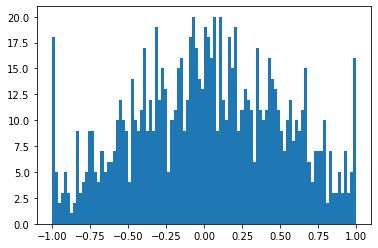

In [8]:
print('leak:', 0,  ', time:', 0)
plt.figure()
plt.hist(log_esn_train_shuffle_norm[0, 0, :], bins=100)
plt.show

leak: 2 , time: 0


<function matplotlib.pyplot.show(*args, **kw)>

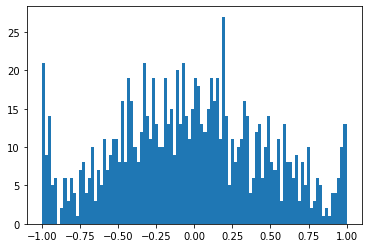

In [21]:
print('leak:', 2,  ', time:', 0)
plt.figure()
plt.hist(log_esn_train_shuffle_norm[2, 0, :], bins=100)
plt.show

leak: 0 , time: -1


<function matplotlib.pyplot.show(*args, **kw)>

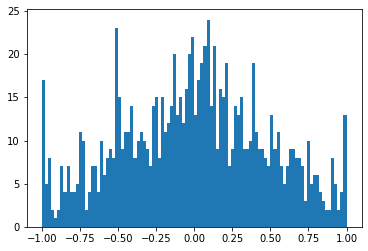

In [10]:
print('leak:', 2,  ', time:', -1)
plt.figure()
plt.hist(log_esn_train_shuffle_norm[2, -1, :], bins=100)
plt.show

leak: 2 , time: -1


<function matplotlib.pyplot.show(*args, **kw)>

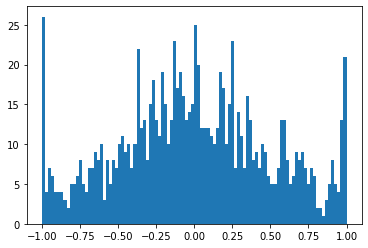

In [18]:
print('leak:', 2,  ', time:', -1)
plt.figure()
plt.hist(log_esn_train_shuffle_norm[2, -1, :], bins=100)
plt.show

In [12]:
np.save('data/esn_lorenz/log_esn_train_shuffle_norm.npy', log_esn_train_shuffle_norm)
np.save('data/esn_lorenz/log_esn_valid_norm.npy', log_esn_valid_norm)
np.save('data/esn_lorenz/log_esn_test_norm.npy', log_esn_test_norm)